In [1]:
import scanpy as sc
import scvi 
import anndata
import matplotlib.pyplot as plt
import numpy as np 
import torch
import pandas as pd
import seaborn as sb
import scanpy.external as sce
from tqdm import tqdm

torch.cuda.is_available() 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
scvi.settings.seed = 0

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
scvi.__version__

Global seed set to 0
/opt/conda/envs/SCVI-env/lib/python3.9/site-packages/flax/struct.py:133: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/opt/conda/envs/SCVI-env/lib/python3.9/site-packages/flax/struct.py:133: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/opt/conda/envs/SCVI-env/lib/python3.9/site-packages/flax/struct.py:133: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
Global seed set to 0


'0.20.1'

In [2]:
adata_disease= anndata.read_h5ad('gut_adata_subset_for_trajectory_analysis.h5ad')
meta = pd.read_csv('meta_subset.csv')
adata_disease.obs = meta.set_index('index')

/tmp/ipykernel_3967/2407500387.py:2: DtypeWarning: Columns (82,83,86) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('meta_subset.csv')


In [3]:
adata_disease

AnnData object with n_obs × n_vars = 8764 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spli

In [4]:
adata_healthy = anndata.read_h5ad('DUO_healthy_control.h5ad')
meta = pd.read_csv('meta_subset_duo_healthy.csv')
adata_healthy.obs = meta.set_index('index')

/tmp/ipykernel_3967/1113044.py:2: DtypeWarning: Columns (93) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('meta_subset_duo_healthy.csv')


In [5]:
adata_healthy

AnnData object with n_obs × n_vars = 12001 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spl

In [6]:
adata_disease.layers['counts'] = adata_disease.X

In [7]:
adata_healthy.layers['counts'] = adata_healthy.X

In [8]:
#adata.layers['counts'] = adata.X <-- only for one adata -- disease run

In [9]:
adata_disease.obs['ID'] = np.repeat('DISEASE', adata_disease.shape[0])
adata_healthy.obs['ID'] = np.repeat('HEALTHY', adata_healthy.shape[0])
adata = adata_healthy.concatenate(adata_disease)

In [10]:
adata

AnnData object with n_obs × n_vars = 20765 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spl

In [12]:
np.unique(adata.obs['ID']) 

array(['DISEASE', 'HEALTHY'], dtype=object)

In [13]:
adata.X.data

array([ 2.,  1.,  2., ..., 64.,  6., 63.], dtype=float32)

In [15]:
adata_original = adata.copy() 

In [17]:
adata_original .X.data

array([ 2.,  1.,  2., ..., 64.,  6., 63.], dtype=float32)

In [18]:
adata = adata_original.copy()
adata.layers['counts'] = adata.X
sc.pp.filter_genes(adata, min_cells=3)
# remove cell cycle genes
ribo_genes = pd.read_csv('RPL_genes.csv', header=0 ) # https://notebook.community/theislab/scanpy_usage/180209_cell_cycle/cell_cycle -- 97 CC GENES
ribo_genes = list(ribo_genes['0'])
adata = adata[:,~np.in1d(adata.var_names,ribo_genes)] 
sc.pp.highly_variable_genes(adata,  n_top_genes=5000, subset=True,flavor="seurat_v3") # flavor='seurat_v3', in which count data is expected.
sc.pp.normalize_per_cell(adata, 10000) 
sc.pp.log1p(adata)
sc.pp.pca(adata)
adata.raw = adata  # keep full dimension safe
adata.X.data
adata.obs['batch'] = adata.obs["donorID_unified"]

def preprocess2(adata):
    scvi.settings.seed = 0
    scvi.model.SCVI.setup_anndata(adata, layer="counts", batch_key='batch'
                                  , continuous_covariate_keys=['log1p_n_counts','percent_mito'],)
    vae = scvi.model.SCVI(adata, n_layers=2, n_latent=10, dropout_rate=0.2) # gene_likelihood="nb"
    vae.train()
    adata.obsm["X_scVI"] = vae.get_latent_representation()
    sc.pp.neighbors(adata, use_rep="X_scVI",method='gauss')
    sc.tl.umap(adata)
    #sc.tl.leiden(adata)
    return adata
adata = preprocess2(adata)

/opt/conda/envs/SCVI-env/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
Global seed set to 0
/opt/conda/envs/SCVI-env/lib/python3.9/site-packages/scvi/data/_utils.py:175: UserWarning: Category 12 in adata.obs['_scvi_batch'] has fewer than 3 cells. Models may not train properly.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 385/385: 100%|██████████| 385/385 [11:38<00:00,  1.82s/it, loss=1.29e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=385` reached.


Epoch 385/385: 100%|██████████| 385/385 [11:38<00:00,  1.81s/it, loss=1.29e+03, v_num=1]


/opt/conda/envs/SCVI-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


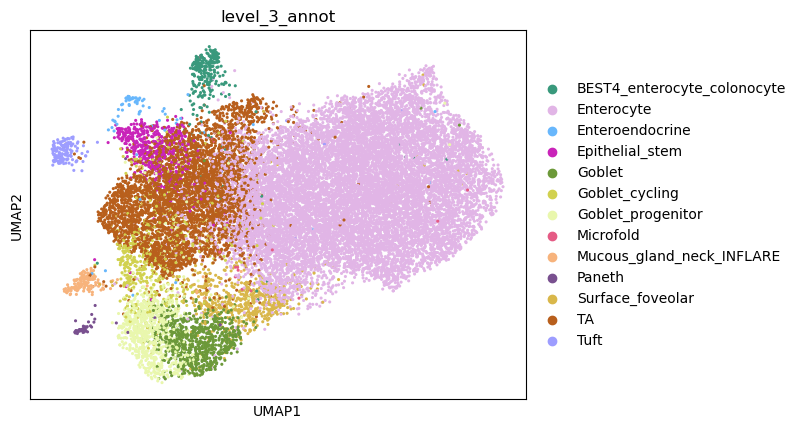

In [22]:
our_cmap = {}
our_palette = adata_healthy.uns['level_3_annot_colors']
i = 0 
for c in np.unique(adata.obs['level_3_annot']) :
    our_cmap[c] = our_palette[i]
    i+=1
sc.pl.umap(adata ,color=["level_3_annot"], s=20, palette=our_cmap)

/opt/conda/envs/SCVI-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/SCVI-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


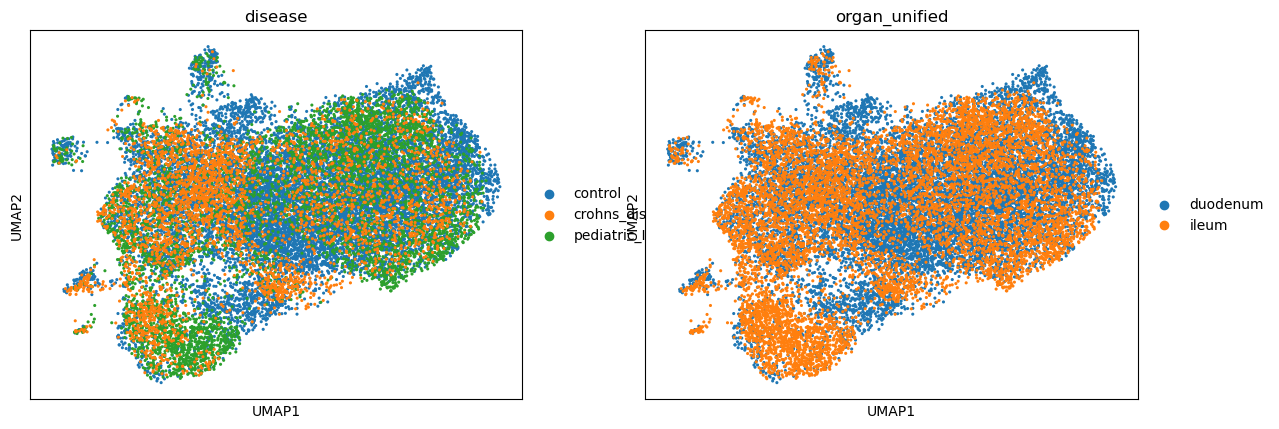

In [26]:
sc.pl.umap(adata ,color=["disease",'organ_unified'], s=20)

In [23]:
len(np.unique(adata.obs.level_3_annot)) 

13

In [24]:
adata

AnnData object with n_obs × n_vars = 20765 × 5000
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spli

In [25]:
our_palette

array(['#39997c', '#e1b5e6', '#68b7fc', '#c924b9', '#6c9939', '#d1d14f',
       '#e9f7ad', '#e55b85', '#f7b37c', '#79508f', '#d9b74a', '#b85f1c',
       '#9d9dff'], dtype=object)

In [28]:
adata

AnnData object with n_obs × n_vars = 20765 × 5000
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spli

In [27]:
adata_original 

AnnData object with n_obs × n_vars = 20765 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spl

In [144]:
#adata_original = adata_healthy.concatenate(adata_disease)

In [29]:
adata_original.obsm['X_scVI'] = adata.obsm['X_scVI']
adata_original.obsm['X_umap_scvi'] = adata.obsm['X_umap']

/opt/conda/envs/SCVI-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/SCVI-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


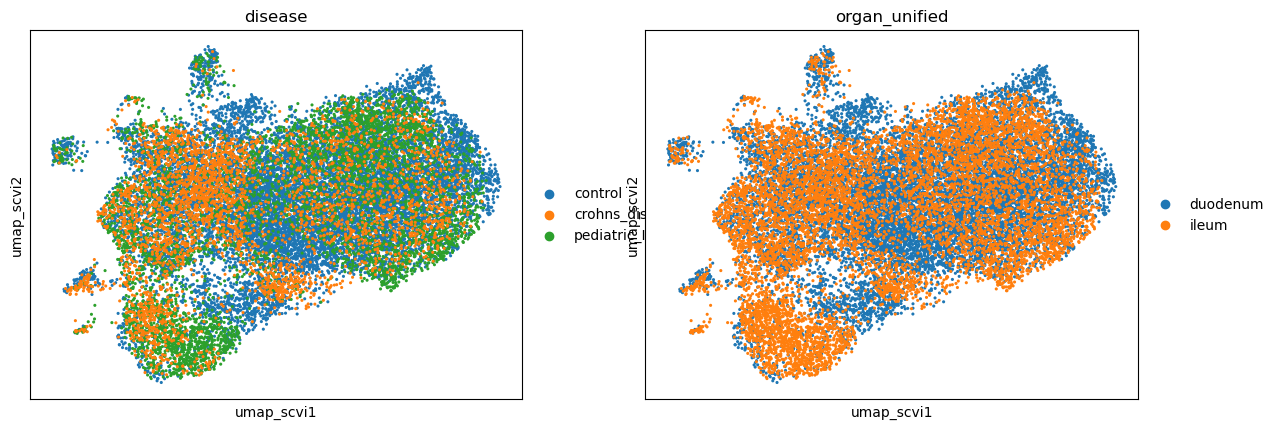

/opt/conda/envs/SCVI-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


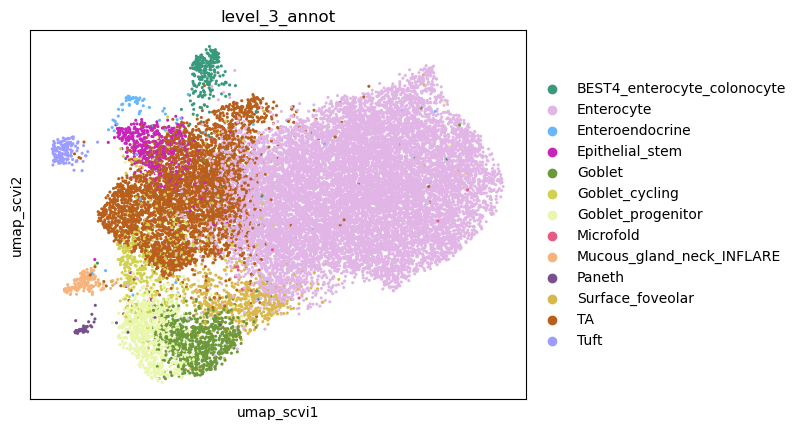

In [30]:
sc.pl.embedding(adata_original , basis='umap_scvi', color=["disease",'organ_unified'], s=20)
sc.pl.embedding(adata_original ,basis='umap_scvi',color=["level_3_annot"], s=20, palette=our_cmap)

In [163]:
adata

AnnData object with n_obs × n_vars = 20765 × 5000
    var: 'gene_ids', 'feature_type', 'mito', 'ribo', 'hb', 'cc', 'ig', 'tcr', 'n_counts-0', 'n_counts_raw-0', 'n_counts_spliced-0', 'n_counts_unspliced-0', 'n_cells-0', 'n_cells_raw-0', 'n_cells_spliced-0', 'n_cells_unspliced-0', 'n_counts-1', 'n_counts_raw-1', 'n_counts_spliced-1', 'n_counts_unspliced-1', 'n_cells-1', 'n_cells_raw-1', 'n_cells_spliced-1', 'n_cells_unspliced-1', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'log1p', 'pca', 'hvg', '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'level_3_annot_colors', 'disease_colors', 'organ_unified_colors'
    obsm: 'X_mde', 'X_scANVI', 'X_scVI', 'X_umap', 'X_umap_scvi', '_scvi_extra_continuous_covs', 'X_pca'
    varm: 'PCs'
    layers: 'spliced', 'unspliced', 'counts'
    obsp: 'distances', 'connectivities'

In [31]:
adata_original.obs.to_csv('attic/meta_subset_duo_healthy_ileum_disease.csv')
del adata_original.obs

In [32]:
adata_original

AnnData object with n_obs × n_vars = 20765 × 36601
    var: 'gene_ids', 'feature_type', 'mito', 'ribo', 'hb', 'cc', 'ig', 'tcr', 'n_counts-0', 'n_counts_raw-0', 'n_counts_spliced-0', 'n_counts_unspliced-0', 'n_cells-0', 'n_cells_raw-0', 'n_cells_spliced-0', 'n_cells_unspliced-0', 'n_counts-1', 'n_counts_raw-1', 'n_counts_spliced-1', 'n_counts_unspliced-1', 'n_cells-1', 'n_cells_raw-1', 'n_cells_spliced-1', 'n_cells_unspliced-1'
    uns: 'disease_colors', 'organ_unified_colors', 'level_3_annot_colors'
    obsm: 'X_mde', 'X_scANVI', 'X_scVI', 'X_umap', 'X_umap_scvi', '_scvi_extra_continuous_covs'
    layers: 'spliced', 'unspliced', 'counts'

In [172]:
#adata.obsm['X_umap_scvi'] = adata.obsm['X_umap']

In [33]:
adata_original.write_h5ad('attic/duo_healthy_ileum_disease.h5ad')